In [43]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sbs

In [44]:
api4='http://chainradar.com/api/v1/mro/blocks/range/1542700/1542706/full'
payload={'type':'GET'}

In [45]:
response3=requests.get(api4,params=payload)
lista_json=response3.json()

The json object returned from the API call is a list of json trees each having three headers: 'cc','blockHeader' and 'transactions'. There are seven elements in the list because we pass the header id of seven blocks (see the API url above): 1542700 to 1542706.

An example of the meta data viewable at the block level... remember, our call returned six such blocks.

In [46]:
lista_json[6]['blockHeader']

{'alreadyGeneratedCoins': 1.5888229638262e+19,
 'baseReward': 4879988318320,
 'blockSize': 266886,
 'cumulativeTxCount': 4159983,
 'difficulty': 129979810854,
 'feeSumm': 0,
 'fullRewardMaxBlockSize': 300000,
 'hash': '47b2b748c96ddf525eb405ce1b4a4d779ad0cee80ea933101f71aee68762c16d',
 'height': 1542706,
 'orphan': False,
 'penalty': 0,
 'prevBlockHash': 'dbedf10e8376ea74b236f5eaa9bad833e47a34b69b61a018e604f2a0e9401bcb',
 'reward': 4931133338320,
 'rewardBlocksWindow': 100,
 'sizeMedian': 39784,
 'timestamp': 1522610689,
 'txCount': 3,
 'txCumulativeSize': 266778}

Beneath the 'transactions' is a list of json objects - one element per transaction, and in the case above, there are three.  These json objects contain the following keys:

In [47]:
lista_json[6]['transactions'][2].keys()

dict_keys(['hash', 'size', 'fee', 'mixin', 'unlockTime', 'timestamp', 'removed', 'reason', 'blockHash', 'blockHeight', 'inputsCount', 'totalInputsAmount', 'outputsCount', 'totalOutputsAmount'])

In [48]:
lista_json[6]['transactions'][2]

{'blockHash': '47b2b748c96ddf525eb405ce1b4a4d779ad0cee80ea933101f71aee68762c16d',
 'blockHeight': 1542706,
 'fee': 0,
 'hash': '561b5279d4a11ca20eaa887ebe6c49bd7b73f19d71945726eea3434807f6e4e3',
 'inputsCount': 2,
 'mixin': 5,
 'outputsCount': 21,
 'reason': 'AddedToBlock',
 'removed': 1522610689,
 'size': 133337,
 'timestamp': 1522610689,
 'totalInputsAmount': 0,
 'totalOutputsAmount': 0,
 'unlockTime': 0}

#Plotting and time series using their convention of timestamp:


In [49]:
df=pd.DataFrame([i['blockHeader'] for i in lista_json])
#df=pd.DataFrame.from_dict([i['blockHeader'] for i in lista_json],orient='records')

In [50]:
df.head()
df.shape
df.dtypes

#convert the timestamp columns to datetime from int64
df['timestamp']=df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [51]:
df['timestamp']

0   2018-04-01 15:10:39
1   2018-04-01 15:10:55
2   2018-04-01 15:11:10
3   2018-04-01 15:11:17
4   2018-04-01 15:14:47
5   2018-04-01 15:24:35
6   2018-04-01 15:24:49
Name: timestamp, dtype: datetime64[ns]

Blocks are added to the blockchain quickly but with a good amount of variance! Below is the difference in timestamps in seconds.

In [52]:
arr=np.array(df['timestamp'])
g=arr[1:]-arr[:-1]
g/10**9

array([ 16,  15,   7, 210, 588,  14], dtype='timedelta64[ns]')

A time series chart of the number of block size of each block.

In [53]:
df1=df.set_index(df['timestamp'])

C:\Users\callejal\AppData\Local\Continuum\Miniconda2\envs\py36\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


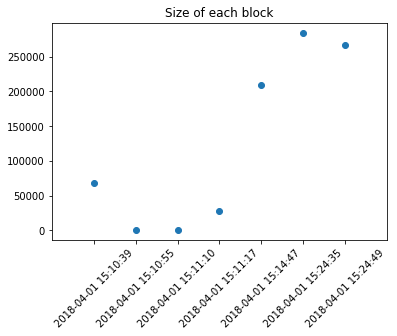

In [54]:
sbs.tsplot(df['blockSize'],interpolate=False)
plt.xticks(np.arange(7),df['timestamp'],rotation=45)
plt.title('Size of each block')
plt.show()

In order to accomplish some exploratory analysis, I'll retrieve many more blocks... I'll use the same range convention as above.

In [55]:
api6='http://chainradar.com/api/v1/mro/blocks/range/1541700/1542806/full'
payload={'type':'GET'}
response4=requests.get(api6,params=payload)
lista_json2=response4.json()

In [64]:
df_100=pd.DataFrame([i['blockHeader'] for i in lista_json2])

In [65]:
df_100=df_100.set_index(df_100['timestamp'])

C:\Users\callejal\AppData\Local\Continuum\Miniconda2\envs\py36\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


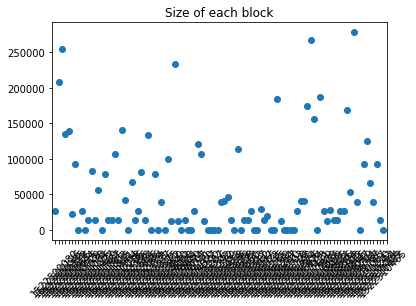

In [66]:
plt.close()
sbs.tsplot(df_100['blockSize'],interpolate=False)
plt.xticks(np.arange(101),df_100['timestamp'],rotation=45)
plt.title('Size of each block')
plt.show()

C:\Users\callejal\AppData\Local\Continuum\Miniconda2\envs\py36\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


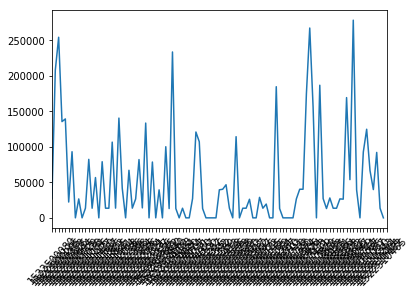

In [67]:
plt.close()
sbs.tsplot(df_100['blockSize'],interpolate=True)
plt.xticks(np.arange(101),df_100['timestamp'],rotation=45)
plt.show()

Plot the time lag to features of the transactions. There were seven transactions, and so six time deltas.

In [70]:
g/10**9
time_lag=g/10**9

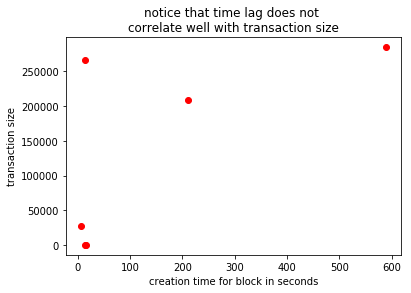

In [77]:
plt.close()
plt.plot(time_lag,df1.iloc[1:,2],'ro')
plt.title('notice that time lag does not \ncorrelate well with transaction size')
plt.ylabel('transaction size')
plt.xlabel('creation time for block in seconds')
plt.show()